# import the packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv(r'C:/Users/koppula ashwini/Downloads/wp/Windpower_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

# Transform the Time columns which type was Object into DateTime Datatype.

In [4]:
df["Unnamed: 0"] = df["Unnamed: 0"].apply(lambda x : datetime.strptime(x[:19],'%Y-%m-%d %H:%M:%S'))
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


# In this step I decided to drop the columns with same values which is useless I think.


In [5]:
drop_list = []
for i in df.columns:
    print(i,len(df[i].value_counts()))
    if len(df[i].value_counts()) == 1:
        drop_list.append(i)
df = df.drop(drop_list,axis = 1)

Unnamed: 0 118224
ActivePower 94084
AmbientTemperatue 93677
BearingShaftTemperature 62286
Blade1PitchAngle 38957
Blade2PitchAngle 39018
Blade3PitchAngle 39018
ControlBoxTemperature 1
GearboxBearingTemperature 62313
GearboxOilTemperature 62412
GeneratorRPM 61067
GeneratorWinding1Temperature 62406
GeneratorWinding2Temperature 62424
HubTemperature 38119
MainBoxTemperature 49146
NacellePosition 6664
ReactivePower 94040
RotorRPM 59260
TurbineStatus 353
WTG 1
WindDirection 6664
WindSpeed 94225


 I'm not sure the missing values are really missed or not measured. And I decide to drop the rows with missing values rather than filling them by median or mean.¶


In [6]:
df = df.dropna()

And here I used the heatmap to check the correlations between different measures

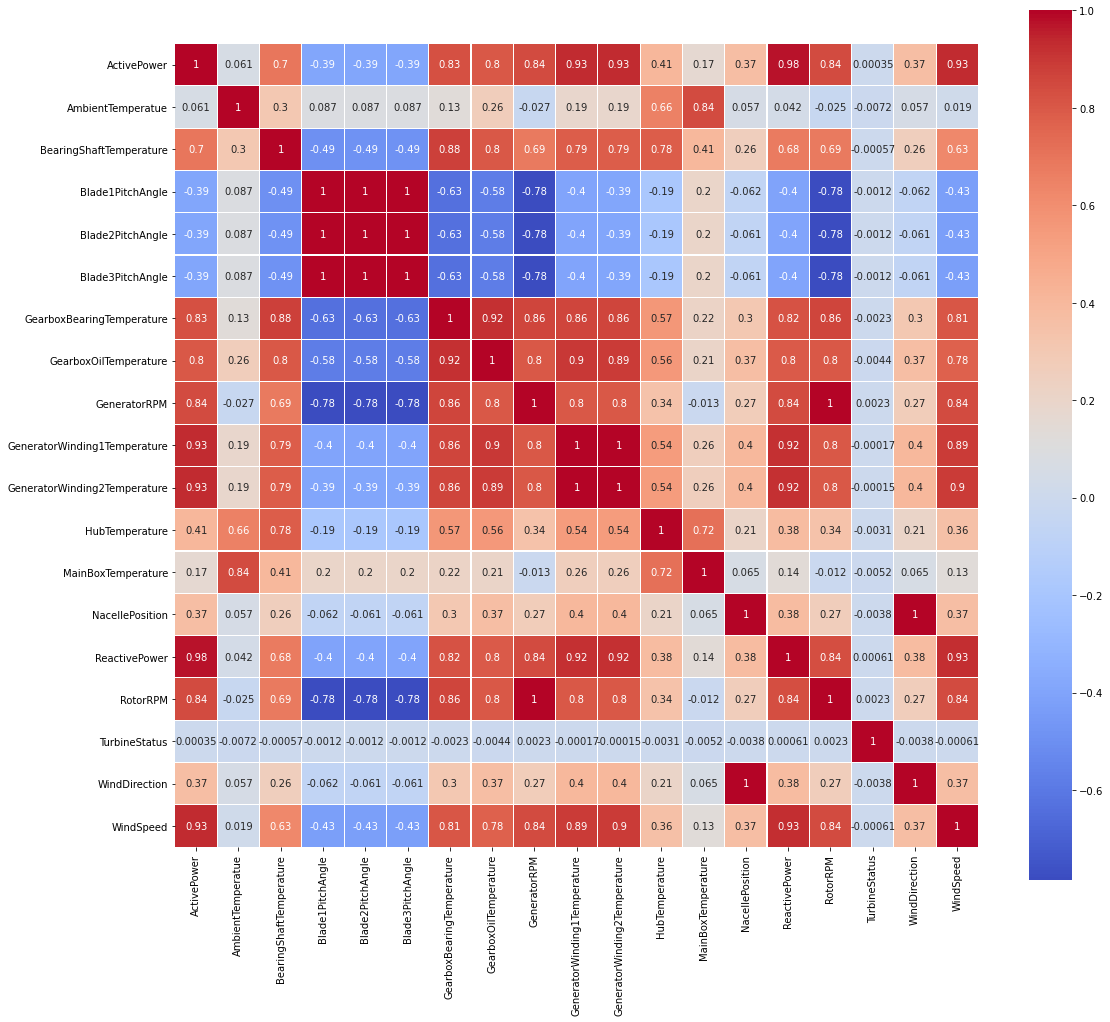

In [7]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),square=True,annot=True,linewidths=0.1,cmap="coolwarm")
plt.show()

To check the distributions for diffferent features with the WindSpeed.



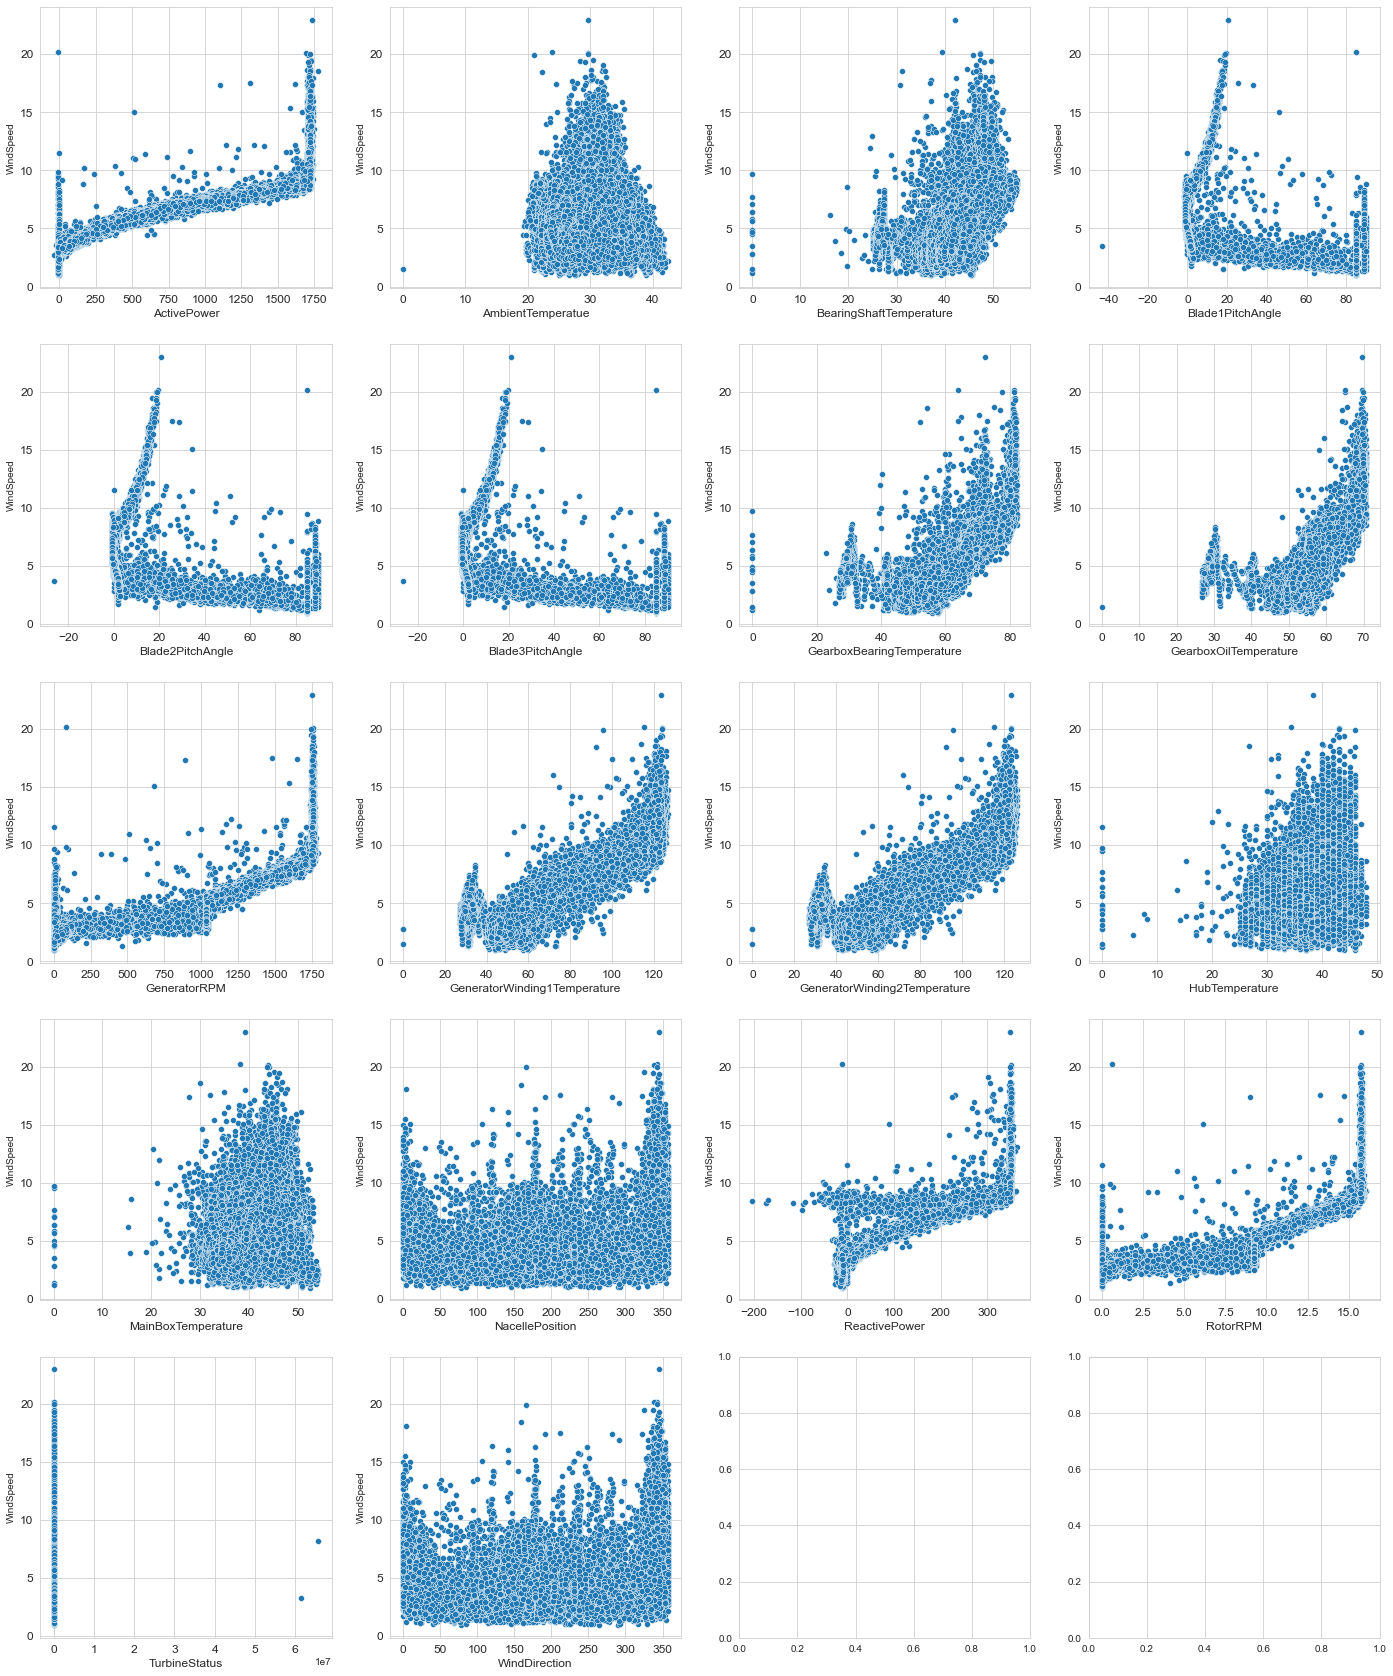

In [8]:
var = df.columns.values

i = 0

sns.set_style('whitegrid')
fig, ax = plt.subplots(5,4,figsize=(24,30))

for feature in var:
    if feature in ['WindSpeed','Unnamed: 0']:
        pass
    else:
        i += 1
        plt.subplot(5,4,i)
        sns.scatterplot(x=feature,y='WindSpeed', data=df[[feature,'WindSpeed']])
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        
plt.show()


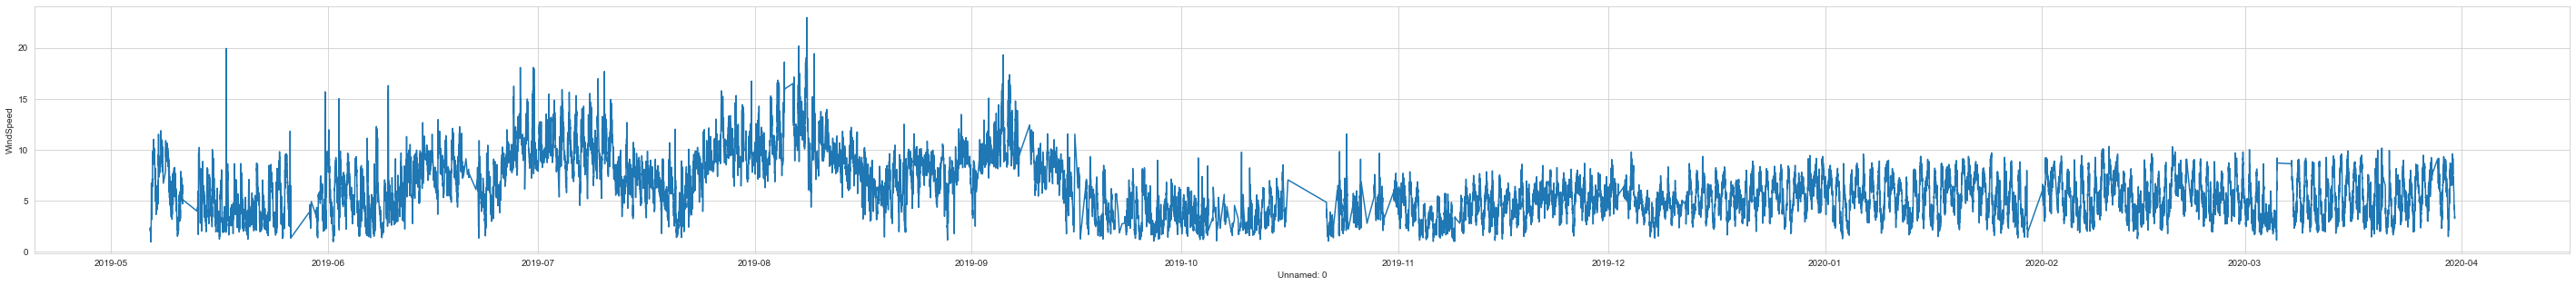

In [9]:
plt.figure(figsize=(50,5))
sns.lineplot(x='Unnamed: 0',y='WindSpeed', data=df[['Unnamed: 0','WindSpeed']])
plt.show()

Use RobustScalr to preprocess the data.

In [10]:
from sklearn.preprocessing import RobustScaler, StandardScaler

rs = RobustScaler()
columns = df.columns.values.tolist()
columns.remove('Unnamed: 0')

preprocessed = rs.fit_transform(df[columns])
preprocessed = pd.DataFrame(preprocessed,columns=columns)

preprocessed['Time'] = pd.to_datetime(df['Unnamed: 0'].astype(str).values.tolist())

preprocessed.dtypes

ActivePower                            float64
AmbientTemperatue                      float64
BearingShaftTemperature                float64
Blade1PitchAngle                       float64
Blade2PitchAngle                       float64
Blade3PitchAngle                       float64
GearboxBearingTemperature              float64
GearboxOilTemperature                  float64
GeneratorRPM                           float64
GeneratorWinding1Temperature           float64
GeneratorWinding2Temperature           float64
HubTemperature                         float64
MainBoxTemperature                     float64
NacellePosition                        float64
ReactivePower                          float64
RotorRPM                               float64
TurbineStatus                          float64
WindDirection                          float64
WindSpeed                              float64
Time                            datetime64[ns]
dtype: object

In [11]:

def accuracy(predicted, observed):
    mse = abs(predicted - observed).mean()      # MSE, Mean Square Error
    rmse = ((predicted - observed)**2).mean()**.5  # RMSE, Root Mean Square Error
    mae = abs(predicted - observed).mean()      # MAE, Mean Absolute Error
    mape = abs((predicted - observed)/observed).mean()  # MAPE, Mean Absolute Percentage Error
    smape = (abs(predicted - observed)/((abs(predicted)+abs(observed))/2)).mean() # SMAPE, Symmetric Mean Absolute Percentage Error

    return({'MSE, Mean Square Error': mse, 
            'RMSE, Root Mean Square Error':rmse, 
            'MAE, Mean Absolute Error': mae, 
            'MAPE, Mean Absolute Percentage Error': mape , 
            'SMAPE, Symmetric Mean Absolute Percentage Error':smape})

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


column_list = ['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'WindDirection']

x = preprocessed[column_list]

y = preprocessed['WindSpeed']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=100)
model = DecisionTreeRegressor().fit(train_x,train_y)
predict_y = model.predict(test_x)


for i in range(len(column_list)):
    print('%s: %.5f'%(column_list[i],model.feature_importances_[i]))


ActivePower: 0.80857
AmbientTemperatue: 0.00261
BearingShaftTemperature: 0.00058
Blade1PitchAngle: 0.00744
Blade2PitchAngle: 0.15490
Blade3PitchAngle: 0.00423
GearboxBearingTemperature: 0.00084
GearboxOilTemperature: 0.00542
GeneratorRPM: 0.00716
GeneratorWinding1Temperature: 0.00064
GeneratorWinding2Temperature: 0.00123
HubTemperature: 0.00098
MainBoxTemperature: 0.00109
NacellePosition: 0.00046
ReactivePower: 0.00142
RotorRPM: 0.00192
WindDirection: 0.00050


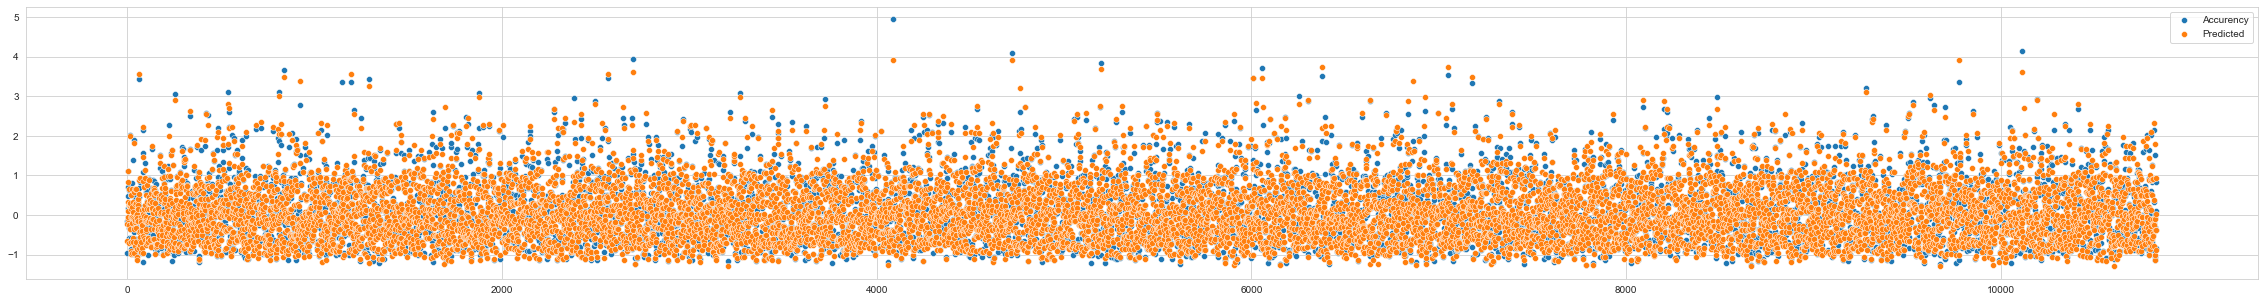

In [13]:
x = range(len(predict_y))
y1 = test_y.values
y2 = predict_y


plt.figure(figsize=(40,5))
sns.scatterplot(x=x, y=y1, legend= 'full')
sns.scatterplot(x=x, y=y2, legend= 'full')
plt.legend(['Accurency','Predicted'])
plt.show()

In [14]:
accuracy(y2, y1)

{'MSE, Mean Square Error': 0.07714443579107448,
 'RMSE, Root Mean Square Error': 0.12169548232094365,
 'MAE, Mean Absolute Error': 0.07714443579107448,
 'MAPE, Mean Absolute Percentage Error': 1.064279837077726,
 'SMAPE, Symmetric Mean Absolute Percentage Error': 0.2770218723200464}

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = preprocessed[column_list]

y = preprocessed['WindSpeed']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=100)

model = LinearRegression().fit(train_x, train_y)
predict_y = model.predict(test_x)

for i in range(len(column_list)):
    print('%s: %.5f'%(column_list[i], model.coef_[i]))

ActivePower: 0.38386
AmbientTemperatue: -0.06497
BearingShaftTemperature: -0.42325
Blade1PitchAngle: 0.00571
Blade2PitchAngle: 0.00419
Blade3PitchAngle: 0.00419
GearboxBearingTemperature: 0.35804
GearboxOilTemperature: -0.17819
GeneratorRPM: 0.00861
GeneratorWinding1Temperature: 1.82419
GeneratorWinding2Temperature: -1.39319
HubTemperature: 0.08451
MainBoxTemperature: 0.07481
NacellePosition: 0.01217
ReactivePower: 0.08245
RotorRPM: 0.15464
WindDirection: 0.01217


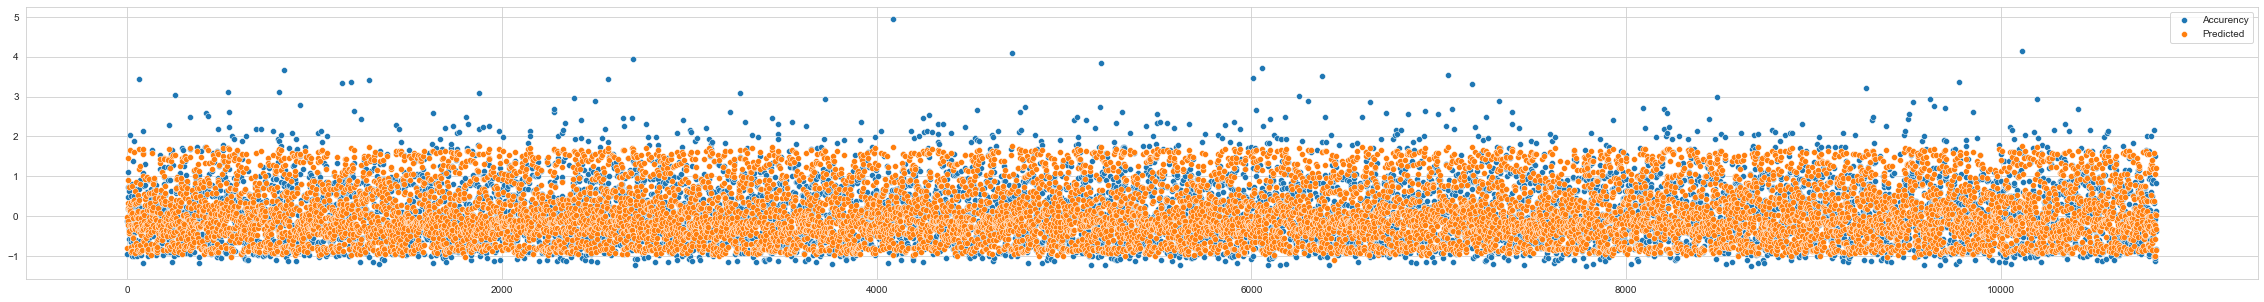

In [16]:
x = range(len(predict_y))
y1 = test_y.values
y2 = predict_y


plt.figure(figsize=(40,5))
sns.scatterplot(x=x, y=y1, legend= 'full')
sns.scatterplot(x=x, y=y2, legend= 'full')
plt.legend(['Accurency','Predicted'])
plt.show()

In [17]:
accuracy(y2, y1)

{'MSE, Mean Square Error': 0.1441605067208881,
 'RMSE, Root Mean Square Error': 0.21954613201103315,
 'MAE, Mean Absolute Error': 0.1441605067208881,
 'MAPE, Mean Absolute Percentage Error': 2.178106757870729,
 'SMAPE, Symmetric Mean Absolute Percentage Error': 0.42439382383093677}